In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('aoty.csv')

df.head()

,id,title,artist,release_date,genres,user_score,rating_count,album_link
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings",https://www.albumoftheyear.org/album/29250-ken...
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings",https://www.albumoftheyear.org/album/3840-kend...
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings",https://www.albumoftheyear.org/album/363-radio...
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings",https://www.albumoftheyear.org/album/5600-stev...
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings",https://www.albumoftheyear.org/album/362-radio...


In [69]:
df = df.drop(columns=['album_link'])
df.head()

,id,title,artist,release_date,genres,user_score,rating_count
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings"
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings"
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings"
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings"
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings"


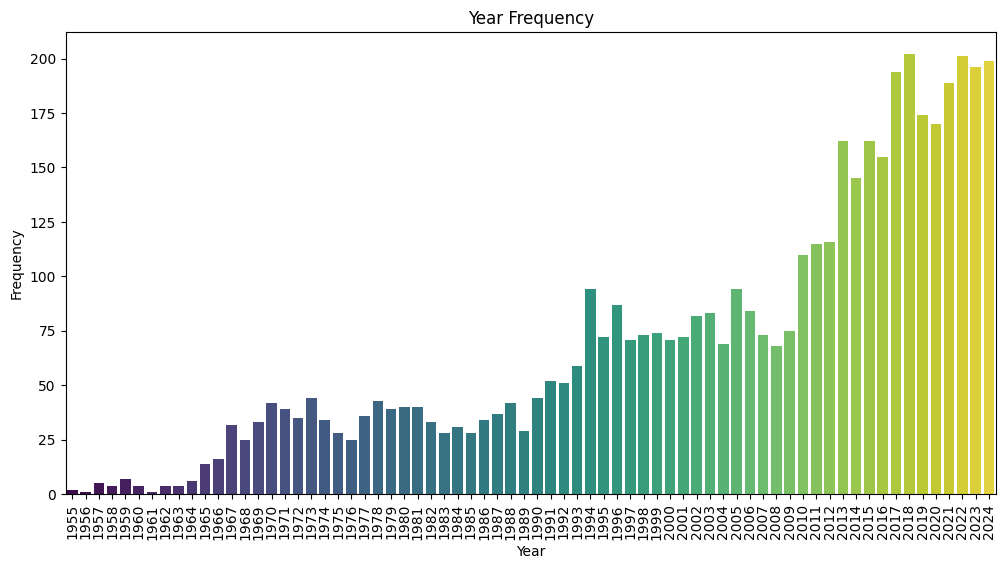

In [ ]:
import matplotlib.pyplot as plt

df['release_date'] = pd.to_datetime(df['release_date'], format='%B %d, %Y', errors='coerce')

df['year'] = df['release_date'].dt.year.astype('Int64')

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\tabib\AppData\Local\Temp\ipykernel_10372\3414881641.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_frequency.index, y=month_frequency.values, palette='viridis')


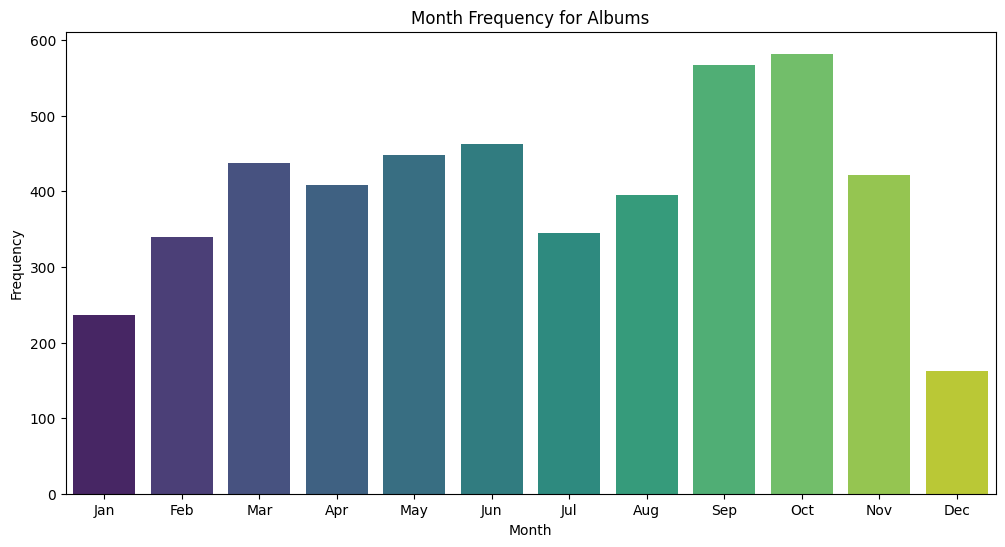

In [75]:
# Extract the month from the release_date column
df['month'] = df['release_date'].dt.month

# Get the frequency of each month
month_frequency = df['month'].value_counts().sort_index()

# Plot the month frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=month_frequency.index, y=month_frequency.values, palette='viridis')
plt.title('Month Frequency for Albums')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

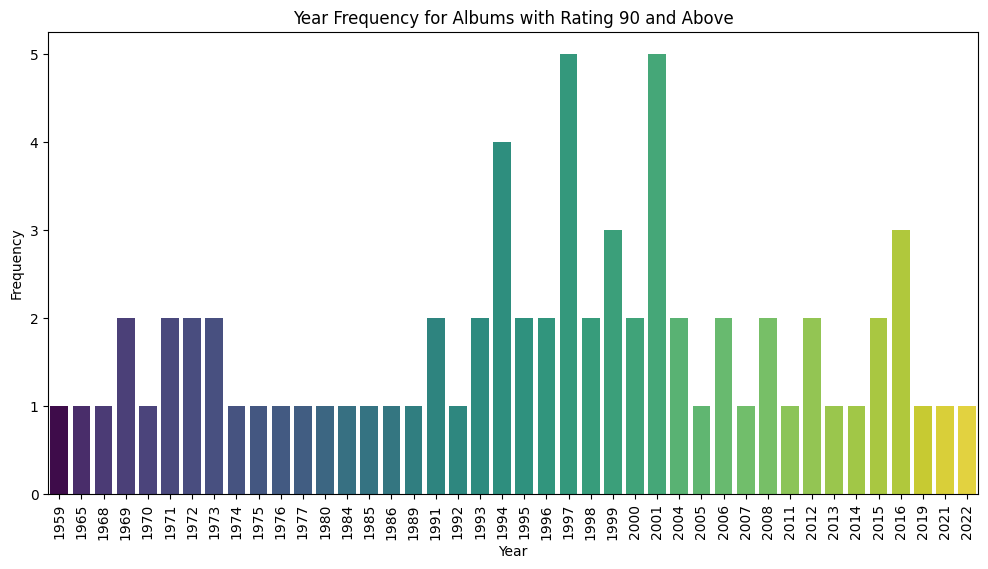

In [77]:
# Filter the dataframe for albums with a user score of 90 and above
df_high_rating = df[df['user_score'] >= 90]

# Plot the year frequency chart for the filtered dataframe
plt.figure(figsize=(12, 6))
sns.countplot(data=df_high_rating, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency for Albums with Rating 90 and Above')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

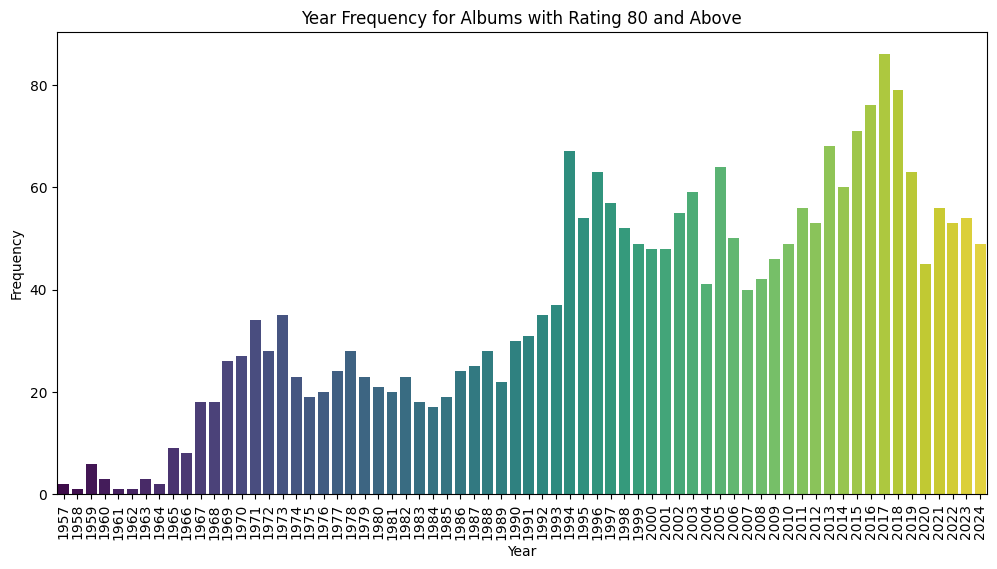

In [78]:
df_high_rating_80 = df[df['user_score'] >= 80]

# Plot the year frequency chart for the filtered dataframe
plt.figure(figsize=(12, 6))
sns.countplot(data=df_high_rating_80, x='year', hue='year', palette='viridis', legend=False)
plt.title('Year Frequency for Albums with Rating 80 and Above')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [81]:
# Split the genres column into individual genres
df_genres = df['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Get the top 10 genres
top_genres = df_genres.value_counts().head(10)

print(top_genres)

Singer-Songwriter     427
Indie Rock            377
Art Pop               278
Alternative Rock      256
East Coast Hip Hop    230
Indie Pop             190
Pop Rock              179
Art Rock              166
Synthpop              161
Neo-Psychedelia       144
Name: count, dtype: int64


In [89]:
# Split the genres column into individual genres for high rating albums
df_high_rating_genres = df_high_rating['genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Get the top 10 genres for high rating albums
top_genres_high_rating = df_high_rating_genres.value_counts().head(10)

print(top_genres_high_rating)

Art Rock              10
Singer-Songwriter      9
Post-Rock              8
East Coast Hip Hop     6
Experimental Rock      5
Electronic             5
Progressive Rock       5
Conscious Hip Hop      5
Alternative Rock       5
Hardcore Hip Hop       4
Name: count, dtype: int64


C:\Users\tabib\AppData\Local\Temp\ipykernel_10372\2359878854.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_year_line = top_genres_per_year.groupby('year').apply(


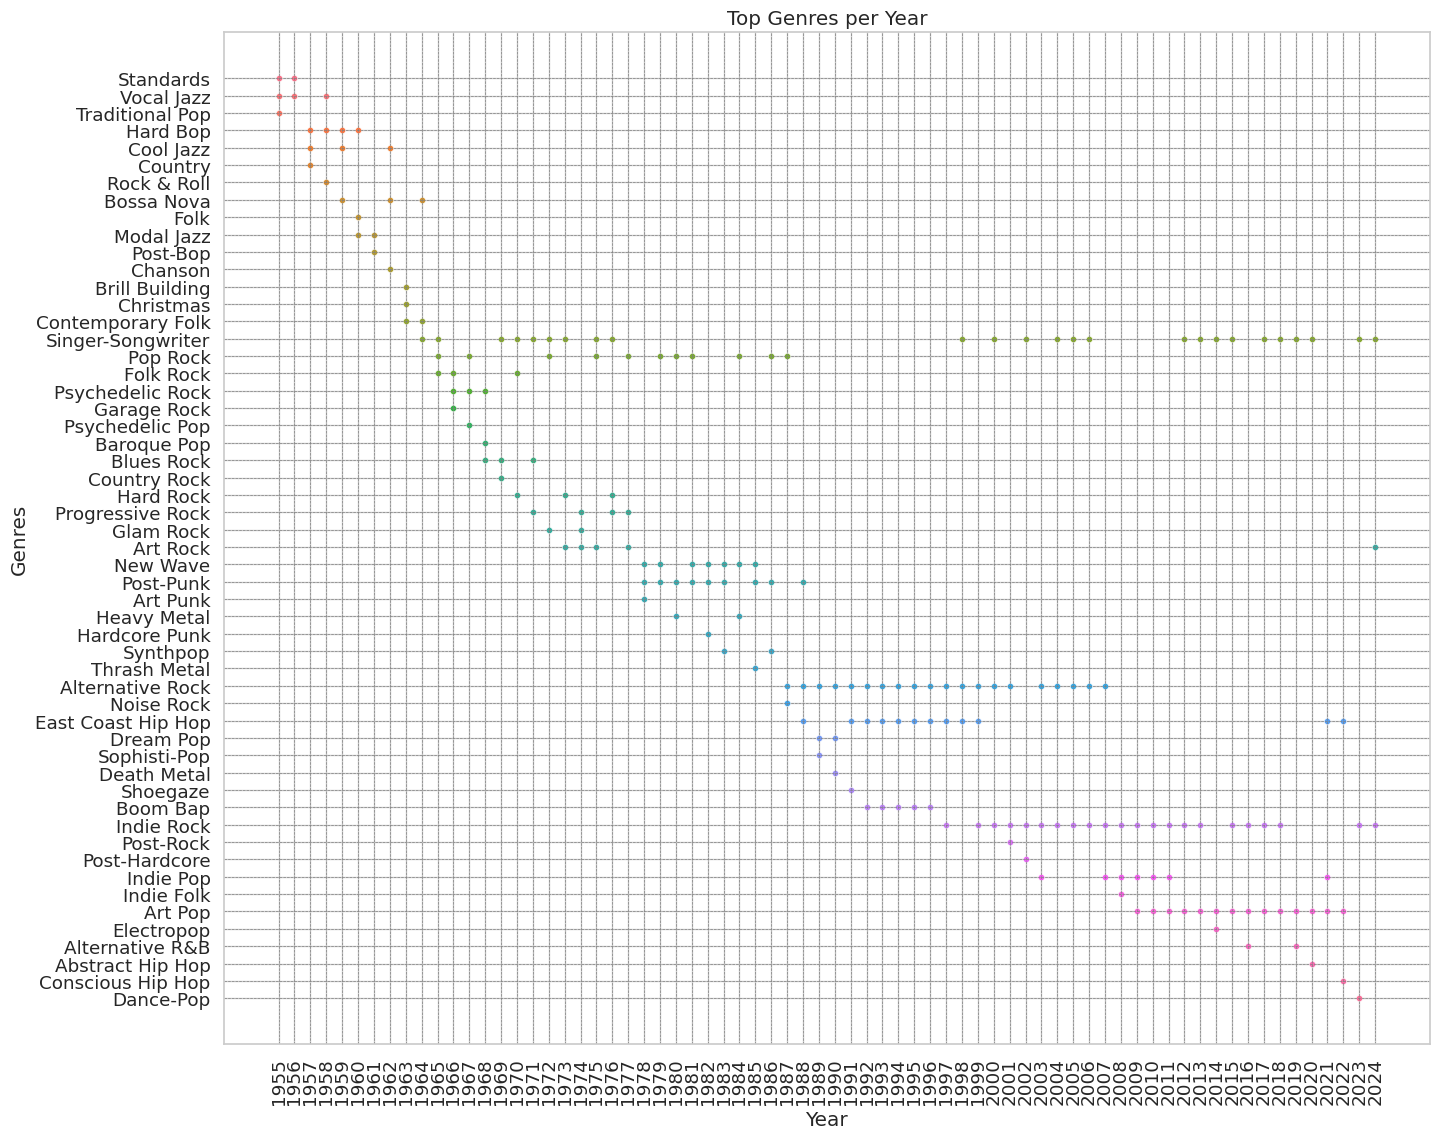

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid", {'font.family': 'DejaVu Sans'})

# Group by year and aggregate genres into a single line
top_genres_per_year_line = top_genres_per_year.groupby('year').apply(
    lambda x: ', '.join(x['genre'] + ' (' + x['count'].astype(str) + ')')
).reset_index(name='genres')

# Create a color palette for the genres
unique_genres = top_genres_per_year['genre'].unique()
palette = sns.color_palette("husl", len(unique_genres))
genre_colors = dict(zip(unique_genres, palette))

# Plot the genres per year
plt.figure(figsize=(15, 12))
for year in top_genres_per_year['year'].unique():
    year_data = top_genres_per_year[top_genres_per_year['year'] == year]
    for genre in year_data['genre']:
        genre_data = year_data[year_data['genre'] == genre]
        sns.scatterplot(data=genre_data, x='year', y='genre', size='count', sizes=(20, 200), color=genre_colors[genre], legend=False)

# Add horizontal guide lines
for genre in unique_genres:
    plt.axhline(y=genre, color='gray', linestyle='--', linewidth=0.5)

# Add vertical lines for each year
for year in top_genres_per_year['year'].unique():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)

plt.title('Top Genres per Year')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.xticks(ticks=top_genres_per_year['year'].unique(), rotation=90)
plt.tight_layout(pad=2.0)
plt.show()

C:\Users\tabib\AppData\Local\Temp\ipykernel_10372\2131401814.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_5_years_line = top_genres_per_5_years.groupby('year_group').apply(


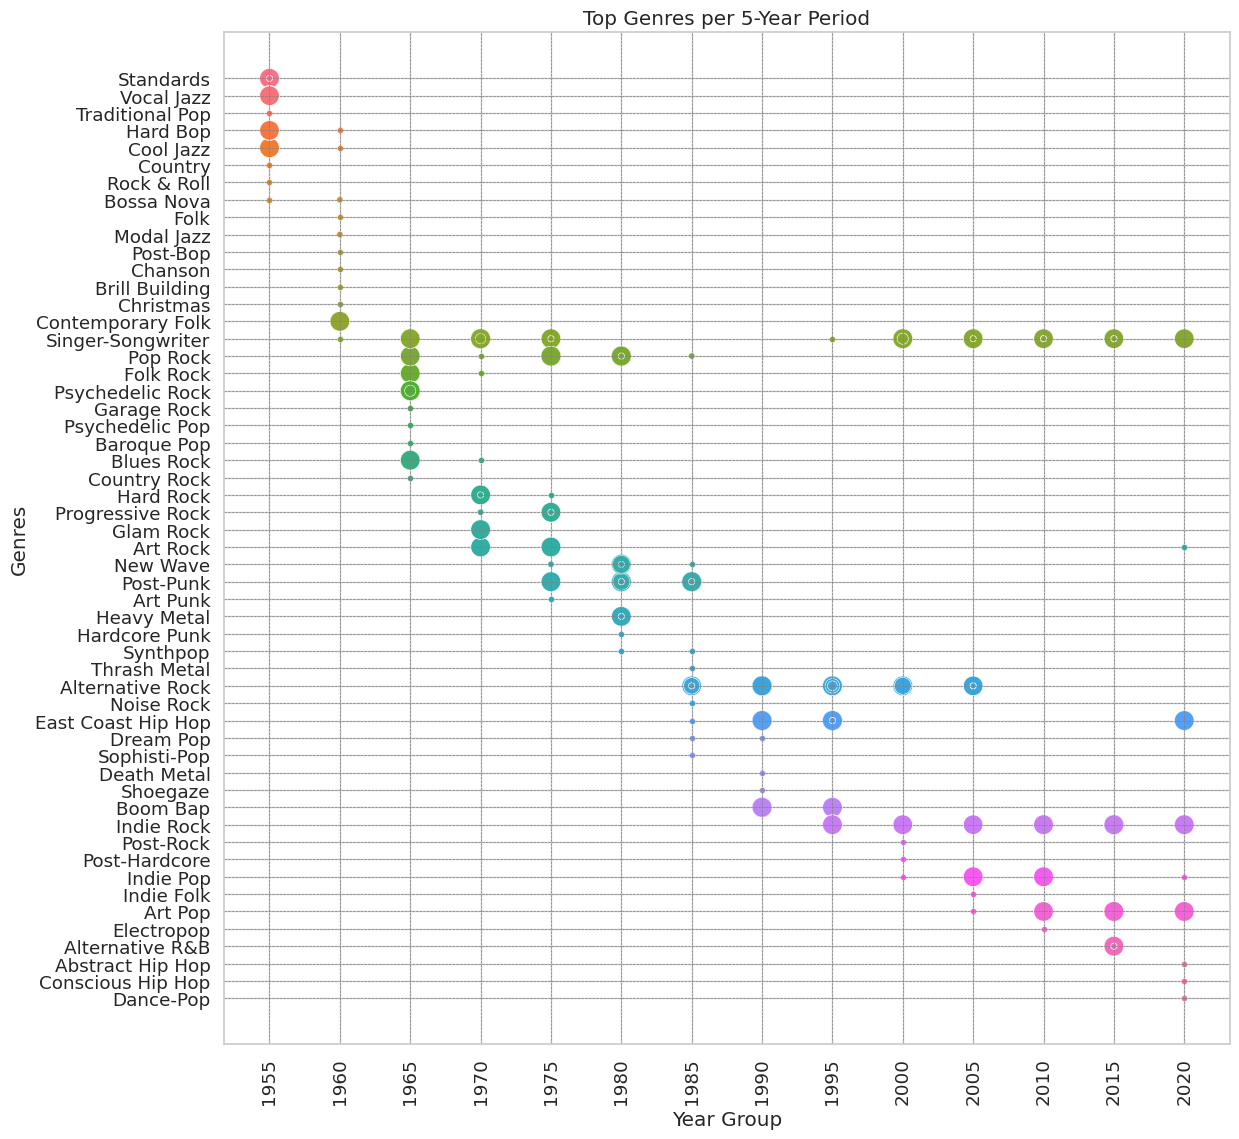

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid", {'font.family': 'DejaVu Sans'})

# Group by 5-year intervals and aggregate genres into a single line
top_genres_per_5_years = top_genres_per_year.copy()
top_genres_per_5_years['year_group'] = (top_genres_per_5_years['year'] // 5) * 5
top_genres_per_5_years_line = top_genres_per_5_years.groupby('year_group').apply(
    lambda x: ', '.join(x['genre'] + ' (' + x['count'].astype(str) + ')')
).reset_index(name='genres')

# Create a color palette for the genres
unique_genres = top_genres_per_5_years['genre'].unique()
palette = sns.color_palette("husl", len(unique_genres))
genre_colors = dict(zip(unique_genres, palette))

# Plot the genres per 5-year period
plt.figure(figsize=(13, 12))
for year_group in top_genres_per_5_years['year_group'].unique():
    year_data = top_genres_per_5_years[top_genres_per_5_years['year_group'] == year_group]
    for genre in year_data['genre']:
        genre_data = year_data[year_data['genre'] == genre]
        sns.scatterplot(data=genre_data, x='year_group', y='genre', size='count', sizes=(20, 200), color=genre_colors[genre], legend=False)

# Add horizontal guide lines
for genre in unique_genres:
    plt.axhline(y=genre, color='gray', linestyle='--', linewidth=0.5)

# Add vertical lines for each 5-year period
for year_group in top_genres_per_5_years['year_group'].unique():
    plt.axvline(x=year_group, color='gray', linestyle='--', linewidth=0.5)

plt.title('Top Genres by Half-Decade')
plt.xlabel('Year Group')
plt.ylabel('Genres')
plt.xticks(ticks=top_genres_per_5_years['year_group'].unique(), rotation=90)
plt.tight_layout(pad=2.0)
plt.show()